In [67]:
from mp_api.client import MPRester
import numpy as np
import torch
import matplotlib.pyplot as plt
from glob import glob
import time, os, sys
from os.path import join as opj
import json
import pandas as pd
from tqdm import tqdm
import csv
import pickle as pkl
import pymatgen
from pymatgen.core.structure import Structure
from pymatgen.core.periodic_table import Element
import datetime
bar_format = '{l_bar}{bar:10}{r_bar}{bar:-10b}'
api_key = "PvfnzQv5PLh4Lzxz1pScKnAtcmmWVaeU"

In [2]:
files = glob(opj('../phonon', '*.json'))
files
generate_fig = False

In [3]:
idx = 10
print(files[idx])
f = open(files[idx])
data = json.load(f)

../phonon/mp-463.json


In [4]:
f

<_io.TextIOWrapper name='../phonon/mp-463.json' mode='r' encoding='UTF-8'>

In [5]:
data

{'phonon': {'qpts': [[0.0, 0.0, 0.0],
   [0.022727272727, 0.0, 0.022727272727],
   [0.045454545455, 0.0, 0.045454545455],
   [0.068181818182, 7.7037197775e-34, 0.068181818182],
   [0.090909090909, 0.0, 0.090909090909],
   [0.11363636364, -1.5407439555e-33, 0.11363636364],
   [0.13636363636, 1.5407439555e-33, 0.13636363636],
   [0.15909090909, -3.081487911e-33, 0.15909090909],
   [0.18181818182, 0.0, 0.18181818182],
   [0.20454545455, 0.0, 0.20454545455],
   [0.22727272727, -3.081487911e-33, 0.22727272727],
   [0.25, 0.0, 0.25],
   [0.27272727273, 3.081487911e-33, 0.27272727273],
   [0.29545454545, 3.081487911e-33, 0.29545454545],
   [0.31818181818, -6.162975822e-33, 0.31818181818],
   [0.34090909091, 0.0, 0.34090909091],
   [0.36363636364, 0.0, 0.36363636364],
   [0.38636363636, 0.0, 0.38636363636],
   [0.40909090909, 0.0, 0.40909090909],
   [0.43181818182, 6.162975822e-33, 0.43181818182],
   [0.45454545455, -6.162975822e-33, 0.45454545455],
   [0.47727272727, 0.0, 0.47727272727],
   [

In [6]:
data.keys()

dict_keys(['phonon', 'thermo', 'flags', 'dielectric', 'metadata'])

In [7]:
data['phonon'].keys()

dict_keys(['qpts', 'ph_dos', 'asr_breaking', 'ph_bandstructure', 'dos_frequencies'])

In [8]:
data['phonon']['qpts']

[[0.0, 0.0, 0.0],
 [0.022727272727, 0.0, 0.022727272727],
 [0.045454545455, 0.0, 0.045454545455],
 [0.068181818182, 7.7037197775e-34, 0.068181818182],
 [0.090909090909, 0.0, 0.090909090909],
 [0.11363636364, -1.5407439555e-33, 0.11363636364],
 [0.13636363636, 1.5407439555e-33, 0.13636363636],
 [0.15909090909, -3.081487911e-33, 0.15909090909],
 [0.18181818182, 0.0, 0.18181818182],
 [0.20454545455, 0.0, 0.20454545455],
 [0.22727272727, -3.081487911e-33, 0.22727272727],
 [0.25, 0.0, 0.25],
 [0.27272727273, 3.081487911e-33, 0.27272727273],
 [0.29545454545, 3.081487911e-33, 0.29545454545],
 [0.31818181818, -6.162975822e-33, 0.31818181818],
 [0.34090909091, 0.0, 0.34090909091],
 [0.36363636364, 0.0, 0.36363636364],
 [0.38636363636, 0.0, 0.38636363636],
 [0.40909090909, 0.0, 0.40909090909],
 [0.43181818182, 6.162975822e-33, 0.43181818182],
 [0.45454545455, -6.162975822e-33, 0.45454545455],
 [0.47727272727, 0.0, 0.47727272727],
 [0.5, 0.0, 0.5],
 [0.5, 0.022727272727, 0.52272727273],
 [0.5, 0.

In [9]:
ph_dos = data['phonon']['ph_dos']

In [10]:
data['phonon']['asr_breaking']

1.2829274804407493

In [11]:
data['phonon']['ph_bandstructure']

[[0.0, 0.0, 0.0, 179.85070110552834, 179.85070110668792, 314.84292907763825],
 [6.524955954019123,
  6.524955954019123,
  14.835812434709894,
  179.94214285053584,
  179.94214285053584,
  314.42276310546066],
 [13.024257235510282,
  13.024257235510282,
  29.557055856802346,
  180.1663780340898,
  180.1663780340898,
  313.10468368410807],
 [19.4632367875267,
  19.4632367875268,
  44.04922436077944,
  180.41920758663483,
  180.41920758663483,
  310.7675554919404],
 [25.796786141274996,
  25.796786141275298,
  58.19792065597233,
  180.6358203029571,
  180.6358203029571,
  307.3374507772381],
 [31.97771048552216,
  31.977710485522326,
  71.8899573436987,
  180.84302221048736,
  180.8430222104874,
  302.86502476138764],
 [37.96700863100623,
  37.967008631006344,
  85.01635316997582,
  181.12496504464255,
  181.12496504464258,
  297.50898872254],
 [43.73596786227133,
  43.73596786227133,
  97.47678817012557,
  181.540609597563,
  181.540609597563,
  291.44520870240143],
 [49.26025180389107,


In [12]:
freq = data['phonon']['dos_frequencies']

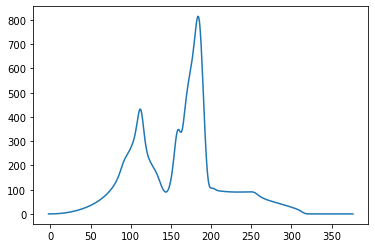

In [13]:
plt.plot(freq, ph_dos)
plt.show()

In [14]:
data['thermo'].keys()

dict_keys(['internal', 'entropy', 'temperature', 'helmholtz_energy', 'C_v'])

In [15]:
band = np.array(data['phonon']['ph_bandstructure'])

In [16]:
band.shape

(146, 6)

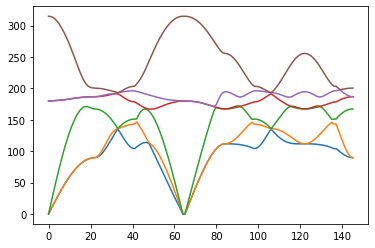

In [17]:
plt.plot(band)

In [18]:
idx = 10
print(files[idx])
f = open(files[idx])
data = json.load(f)

../phonon/mp-463.json


In [19]:
len(files)

1521

In [20]:
idx = 100
print(files[idx])
f = open(files[idx])
data = json.load(f)

../phonon/mp-6983.json


In [21]:
band2 = np.array(data['phonon']['ph_bandstructure'])

In [22]:
band2.shape

(97, 36)

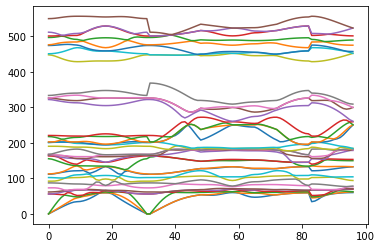

In [23]:
plt.plot(band2)

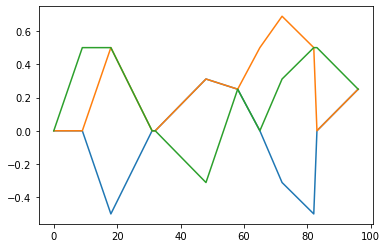

In [24]:
qpt = data['phonon']['qpts']
plt.plot(qpt)

(97, 3)


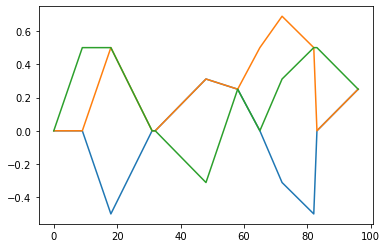

In [25]:
qpt = np.array(data['phonon']['qpts'])
print(qpt.shape)
plt.plot(qpt)

In [26]:
qpt

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.46944695e-18,  5.55555556e-02],
       [ 0.00000000e+00,  6.93889390e-18,  1.11111111e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.66666667e-01],
       [ 0.00000000e+00,  1.38777878e-17,  2.22222222e-01],
       [ 0.00000000e+00,  0.00000000e+00,  2.77777778e-01],
       [ 0.00000000e+00,  0.00000000e+00,  3.33333333e-01],
       [ 0.00000000e+00,  0.00000000e+00,  3.88888889e-01],
       [ 0.00000000e+00,  2.77555756e-17,  4.44444444e-01],
       [ 0.00000000e+00,  0.00000000e+00,  5.00000000e-01],
       [-5.55555556e-02,  5.55555556e-02,  5.00000000e-01],
       [-1.11111111e-01,  1.11111111e-01,  5.00000000e-01],
       [-1.66666667e-01,  1.66666667e-01,  5.00000000e-01],
       [-2.22222222e-01,  2.22222222e-01,  5.00000000e-01],
       [-2.77777778e-01,  2.77777778e-01,  5.00000000e-01],
       [-3.33333333e-01,  3.33333333e-01,  5.00000000e-01],
       [-3.88888889e-01,  3.88888889e-01

In [27]:

idx = 100
print(files[idx])
f = open(files[idx])
data = json.load(f)



../phonon/mp-6983.json


In [4]:
#rr = {"key": 0, "loss": 0, "real_vec": 0, "output_test": np.zeros(0), "real_numvec":0, "pred_numvec":0}
df = pd.DataFrame({})
for _, file in tqdm(enumerate(files), total=len(files), bar_format=bar_format):
    name = file[10:-5]
    f = open(file)
    data = json.load(f)
    freq = data['phonon']['dos_frequencies']
    qpts = data['phonon']['qpts']
    ph_dos = data['phonon']['ph_dos']
    band = data['phonon']['ph_bandstructure']
    rrr = {"name": name, "freq": [freq], "freq_shape": [np.array(freq).shape],"qpts": [qpts], "qpts_shape": [np.array(qpts).shape],
           "ph_dos": [ph_dos], "ph_dos_shape": [np.array(ph_dos).shape], "band":[band], "band_shape":[np.array(band).shape]}
    df0 = pd.DataFrame(data=rrr)
    df = pd.concat([df, df0], ignore_index=True)

100%|██████████| 1521/1521 [00:03<00:00, 388.63it/s]


In [29]:
#df = pd.DataFrame({})
df

,name,freq,freq_shape,qpts,qpts_shape,ph_dos,ph_dos_shape,band,band_shape
0,mp-7173,"[-2.414220753382029, -1.4142208327838217, -0.4...","(323,)","[[0.0, 0.0, 0.0], [0.027777777778, 0.0, 0.0277...","(122, 3)","[0.030276936387718823, 0.052451223084884764, 0...","(323,)","[[0.0, 0.0, 0.0, 158.45382569613412, 158.45382...","(122, 9)"
1,mp-12317,"[-2.414220753382029, -1.4142208327838217, -0.4...","(2625,)","[[0.0, 0.0, 0.0], [0.027777777778, -1.73472347...","(123, 3)","[0.05766554349344308, 0.09677653251525031, 0.1...","(2625,)","[[0.0, 0.0, 0.0, 201.72238331993577, 210.97570...","(123, 12)"
2,mp-8300,"[-127.27730062786078, -126.27730070726258, -12...","(570,)","[[0.0, 0.0, 0.0], [0.0, -1.734723476e-18, 0.03...","(102, 3)","[0.00027623697875081864, 0.0011363675325358666...","(570,)","[[-115.70663693441898, 0.0, 0.0, 0.0, 12.81552...","(102, 21)"
3,mp-27193,"[-2.414220753382029, -1.4142208327838217, -0.4...","(913,)","[[0.0, 0.0, 0.0], [0.038461538462, 0.0, 0.0], ...","(110, 3)","[0.07242711844963592, 0.13130811457754502, 0.2...","(913,)","[[0.0, 0.0, 0.0, 81.52080062662796, 82.8526243...","(110, 15)"
4,mp-961684,"[-2.414220753382029, -1.4142208327838217, -0.4...","(413,)","[[0.0, 0.0, 0.0], [0.027777777778, -1.61710498...","(120, 3)","[0.03136053682845511, 0.054408998078450795, 0....","(413,)","[[0.0, 0.0, 0.0, 212.2629944606852, 212.262994...","(120, 9)"
...,...,...,...,...,...,...,...,...,...
1516,mp-3448,"[-2.414220753382029, -1.4142208327838217, -0.4...","(664,)","[[0.0, 0.0, 0.0], [0.0, 0.0333333333, 0.0], [0...","(115, 3)","[0.025025859726541165, 0.03267550614008182, 0....","(664,)","[[0.0, 0.0, 0.0, 142.7152595557783, 142.715259...","(115, 15)"
1517,mp-241,"[-2.414220753382029, -1.4142208327838217, -0.4...","(482,)","[[0.0, 0.0, 0.0], [0.022727272727, 7.703719777...","(143, 3)","[0.027974923859739445, 0.047927632208468594, 0...","(482,)","[[0.0, 0.0, 0.0, 217.09948113949034, 217.09948...","(143, 9)"
1518,mp-1009082,"[-2.414220753382029, -1.4142208327838217, -0.4...","(361,)","[[0.0, 0.0, 0.0], [-3.469446952e-18, -3.469446...","(94, 3)","[0.12410381130769889, 0.2295524596341403, 0.40...","(361,)","[[0.0, 0.0, 0.0, 57.038869517725075, 57.049852...","(94, 24)"
1519,mp-15685,"[-2.414220753382029, -1.4142208327838217, -0.4...","(375,)","[[0.0, 0.0, 0.0], [0.029429289718, 0.029429289...","(125, 3)","[0.09491974294255719, 0.1703066713874932, 0.29...","(375,)","[[0.0, 0.0, 0.0, 94.15022443050422, 95.6196381...","(125, 24)"


In [30]:
df['band_shape']

0        (122, 9)
1       (123, 12)
2       (102, 21)
3       (110, 15)
4        (120, 9)
          ...    
1516    (115, 15)
1517     (143, 9)
1518     (94, 24)
1519    (125, 24)
1520     (136, 9)
Name: band_shape, Length: 1521, dtype: object

In [31]:
if generate_fig:
    for file in files:
        name = file[10:-5]
        f = open(file)
        data = json.load(f)
        band = np.array(data['phonon']['ph_bandstructure'])
        ph_dos = np.array(data['phonon']['ph_dos'])
        freq = np.array(data['phonon']['dos_frequencies'])
        ymin, ymax = np.min(freq), np.max(freq)
        fig = plt.figure(constrained_layout=True, figsize=(12,6))
        ax1 = fig.add_subplot(121)
        ax1.plot(band)
        ax1.set_ylim([ymin, ymax])
        ax2 = fig.add_subplot(122)
        ax2.plot(ph_dos, freq)
        ax2.set_ylim([ymin, ymax])
        fig.suptitle(name)
        fig.subplots_adjust(hspace=0.6)
        fig.patch.set_facecolor('white')
        fig.show()
        fig.savefig(f'bands/{name}.png') 
    

In [32]:
f = open(files[10])
data = json.load(f)

In [33]:
data.keys()

dict_keys(['phonon', 'thermo', 'flags', 'dielectric', 'metadata'])

In [34]:
data['phonon'].keys()

dict_keys(['qpts', 'ph_dos', 'asr_breaking', 'ph_bandstructure', 'dos_frequencies'])

In [35]:
data['thermo'].keys()

dict_keys(['internal', 'entropy', 'temperature', 'helmholtz_energy', 'C_v'])

In [36]:
data['flags'].keys()

dict_keys(['large_cnsr_break', 'has_neg_fr', 'large_asr_break', 'small_q_neg_fr'])

In [37]:
data['dielectric'].keys()

dict_keys(['becs', 'eps_total', 'cnsr_breaking', 'eps_electronic'])

In [38]:
data['metadata'].keys()

dict_keys(['cutoff', 'pseudopotential_md5', 'qpoints_grid', 'nsites', 'point_group', 'material_id', 'kpoints_shifts', 'formula', 'kpoints_grid', 'structure'])

In [39]:
import zmq

In [5]:
import mp_api

In [6]:
from mp_api import MPRester

In [42]:
import zmq

In [43]:
from mp_api.client import MPRester

with MPRester("PvfnzQv5PLh4Lzxz1pScKnAtcmmWVaeU") as mpr:
    print('x')

ImportError: cannot import name 'MoleculesDoc' from 'emmet.core.molecules' (/home/rokabe/anaconda3/envs/phdos_v1/lib/python3.9/site-packages/emmet/core/molecules/__init__.py)

In [7]:
from emmet.core.molecules import MoleculesDoc

ImportError: cannot import name 'MoleculesDoc' from 'emmet.core.molecules' (/home/rokabe/anaconda3/envs/py310/lib/python3.10/site-packages/emmet/core/molecules/__init__.py)

In [8]:
with MPRester("PvfnzQv5PLh4Lzxz1pScKnAtcmmWVaeU") as mpr:
    doc = mpr.summary.get_data_by_id("mp-149")

Retrieving SummaryDoc documents: 100%|██████████| 1/1 [00:00<00:00, 11814.94it/s]


In [10]:
doc

MPDataDoc<SummaryDoc>(
builder_meta=EmmetMeta(emmet_version='0.18.0', pymatgen_version='2022.0.16', pull_request=644, database_version='2021.11.10', build_date=datetime.datetime(2021, 11, 28, 1, 36, 12, 691000)),
nsites=2,
elements=[Element Si],
nelements=1,
composition=Comp: Si2,
composition_reduced=Comp: Si1,
formula_pretty='Si',
formula_anonymous='A',
chemsys='Si',
volume=40.88829284866483,
density=2.2811942835376744,
density_atomic=20.444146424332416,
symmetry=SymmetryData(crystal_system=<CrystalSystem.cubic: 'Cubic'>, symbol='Fd-3m', number=227, point_group='m-3m', symprec=0.1, version='1.16.2'),
property_name='summary',
material_id=MPID(mp-149),
deprecated=False,
last_updated=datetime.datetime(2021, 11, 28, 1, 36, 12, 691000),
origins=[],
warnings=[],
structure=Structure Summary
Lattice
    abc : 3.8669746532647453 3.8669746532647453 3.8669746532647453
 angles : 59.99999999999999 59.99999999999999 59.99999999999999
 volume : 40.88829284866483
      A : 0.0 2.734364 2.734364
     

In [11]:
type(doc)

pydantic.main.MPDataDoc

In [13]:
with MPRester("PvfnzQv5PLh4Lzxz1pScKnAtcmmWVaeU") as mpr:
    docs = mpr.summary.search(material_ids=["mp-149", "mp-13", "mp-22526"])

Retrieving SummaryDoc documents: 100%|██████████| 3/3 [00:00<00:00, 23831.27it/s]


In [15]:
docs[0]

MPDataDoc<SummaryDoc>(
builder_meta=EmmetMeta(emmet_version='0.18.0', pymatgen_version='2022.0.16', pull_request=644, database_version='2021.11.10', build_date=datetime.datetime(2021, 11, 28, 1, 36, 12, 691000)),
nsites=2,
elements=[Element Si],
nelements=1,
composition=Comp: Si2,
composition_reduced=Comp: Si1,
formula_pretty='Si',
formula_anonymous='A',
chemsys='Si',
volume=40.88829284866483,
density=2.2811942835376744,
density_atomic=20.444146424332416,
symmetry=SymmetryData(crystal_system=<CrystalSystem.cubic: 'Cubic'>, symbol='Fd-3m', number=227, point_group='m-3m', symprec=0.1, version='1.16.2'),
property_name='summary',
material_id=MPID(mp-149),
deprecated=False,
last_updated=datetime.datetime(2021, 11, 28, 1, 36, 12, 691000),
origins=[],
warnings=[],
structure=Structure Summary
Lattice
    abc : 3.8669746532647453 3.8669746532647453 3.8669746532647453
 angles : 59.99999999999999 59.99999999999999 59.99999999999999
 volume : 40.88829284866483
      A : 0.0 2.734364 2.734364
     

In [16]:
mpid = doc.material_id
formula = doc.formula_pretty

In [19]:
mpid

MPID(mp-149)

In [20]:
formula

'Si'

In [22]:
list_of_available_fields = mpr.summary.available_fields
list_of_available_fields

['builder_meta',
 'nsites',
 'elements',
 'nelements',
 'composition',
 'composition_reduced',
 'formula_pretty',
 'formula_anonymous',
 'chemsys',
 'volume',
 'density',
 'density_atomic',
 'symmetry',
 'property_name',
 'material_id',
 'deprecated',
 'deprecation_reasons',
 'last_updated',
 'origins',
 'warnings',
 'structure',
 'task_ids',
 'uncorrected_energy_per_atom',
 'energy_per_atom',
 'formation_energy_per_atom',
 'energy_above_hull',
 'is_stable',
 'equilibrium_reaction_energy_per_atom',
 'decomposes_to',
 'xas',
 'grain_boundaries',
 'band_gap',
 'cbm',
 'vbm',
 'efermi',
 'is_gap_direct',
 'is_metal',
 'es_source_calc_id',
 'bandstructure',
 'dos',
 'dos_energy_up',
 'dos_energy_down',
 'is_magnetic',
 'ordering',
 'total_magnetization',
 'total_magnetization_normalized_vol',
 'total_magnetization_normalized_formula_units',
 'num_magnetic_sites',
 'num_unique_magnetic_sites',
 'types_of_magnetic_species',
 'k_voigt',
 'k_reuss',
 'k_vrh',
 'g_voigt',
 'g_reuss',
 'g_vrh',


In [26]:
with MPRester("PvfnzQv5PLh4Lzxz1pScKnAtcmmWVaeU") as mpr:
    docs = mpr.summary.search(elements=["Si", "O"], 
                              band_gap=(0.5, 1.0))

Retrieving SummaryDoc documents: 100%|██████████| 332/332 [00:00<00:00, 1771639.86it/s]


In [28]:
docs

AttributeError: 'MPDataDoc' object has no attribute 'decomposes_to'

In [30]:
with MPRester("PvfnzQv5PLh4Lzxz1pScKnAtcmmWVaeU") as mpr:
    docs = mpr.summary.search(elements=["Si", "O"], 
                              band_gap=(0.5, 1.0),
                              fields=["material_id", 
                                      "band_gap", 
                                      "volume"])

Retrieving SummaryDoc documents: 100%|██████████| 332/332 [00:00<00:00, 2018128.88it/s]


In [31]:
docs

[MPDataDoc<SummaryDoc>(
 volume=335.4257708908094,
 material_id=MPID(mp-1293053),
 band_gap=0.9419,
 fields_not_requested=['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'density', 'density_atomic', 'symmetry', 'property_name', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'k_voigt', 'k_reuss', 'k_vrh', '

In [32]:
with MPRester("PvfnzQv5PLh4Lzxz1pScKnAtcmmWVaeU") as mpr:
    doc = mpr.materials.get_data_by_id("mp-149", fields=["initial_structures"])

initial_structures = doc.initial_structures

Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 8019.70it/s]


In [33]:
doc

MPDataDoc<MaterialsDoc>(
initial_structures=[Structure Summary
Lattice
    abc : 3.867551652398194 3.867551652398194 3.867551652398194
 angles : 59.99999999999999 59.99999999999999 59.99999999999999
 volume : 40.906598655233736
      A : 0.0 2.734772 2.734772
      B : 2.734772 0.0 2.734772
      C : 2.734772 2.734772 0.0
    pbc : True True True
PeriodicSite: Si (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Si (1.3674, 1.3674, 1.3674) [0.2500, 0.2500, 0.2500]],
fields_not_requested=['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'material_id', 'structure', 'deprecated', 'deprecation_reasons', 'task_ids', 'deprecated_tasks', 'calc_types', 'last_updated', 'created_at', 'origins', 'warnings', 'task_types', 'run_types', 'entries']
)

In [34]:
initial_structures

[Structure Summary
 Lattice
     abc : 3.867551652398194 3.867551652398194 3.867551652398194
  angles : 59.99999999999999 59.99999999999999 59.99999999999999
  volume : 40.906598655233736
       A : 0.0 2.734772 2.734772
       B : 2.734772 0.0 2.734772
       C : 2.734772 2.734772 0.0
     pbc : True True True
 PeriodicSite: Si (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
 PeriodicSite: Si (1.3674, 1.3674, 1.3674) [0.2500, 0.2500, 0.2500]]

In [ ]:
with MPRester("PvfnzQv5PLh4Lzxz1pScKnAtcmmWVaeU") as mpr:
    docs = mpr.materials.search(elements=["Si", "O"], 
                                band_gap=(0.5, 1.0),
                                fields=["initial_structures"])
                                              
example_doc = docs[0]
initial_structures = example_doc.initial_structures

In [35]:
files = glob(opj('../phonon', '*.json'))
files
generate_fig = False

In [50]:
mp_ids = sorted([file[10:-5] for file in files])
mp_ids

['mp-1000',
 'mp-1002124',
 'mp-1002164',
 'mp-10044',
 'mp-1008223',
 'mp-1008506',
 'mp-1008556',
 'mp-1008559',
 'mp-10086',
 'mp-1008680',
 'mp-1008786',
 'mp-1009009',
 'mp-1009082',
 'mp-1009084',
 'mp-1009085',
 'mp-1009087',
 'mp-1009088',
 'mp-1009127',
 'mp-1009129',
 'mp-1009220',
 'mp-1009540',
 'mp-1009733',
 'mp-1009750',
 'mp-1009792',
 'mp-1009813',
 'mp-1009819',
 'mp-1009820',
 'mp-1009894',
 'mp-1011695',
 'mp-1014244',
 'mp-10155',
 'mp-10159',
 'mp-10163',
 'mp-10167',
 'mp-1018040',
 'mp-1018096',
 'mp-1018100',
 'mp-10182',
 'mp-1020019',
 'mp-1020059',
 'mp-10219',
 'mp-1022',
 'mp-10223',
 'mp-10226',
 'mp-10246',
 'mp-10250',
 'mp-10281',
 'mp-10289',
 'mp-1029',
 'mp-10322',
 'mp-10336',
 'mp-10341',
 'mp-10378',
 'mp-10381',
 'mp-1039',
 'mp-10408',
 'mp-10417',
 'mp-10418',
 'mp-10474',
 'mp-10481',
 'mp-10485',
 'mp-10492',
 'mp-10547',
 'mp-10550',
 'mp-10572',
 'mp-10614',
 'mp-10615',
 'mp-10616',
 'mp-10627',
 'mp-10653',
 'mp-10680',
 'mp-10694',
 'mp

In [51]:
id_mat = {}
with MPRester(api_key) as mpr:
    for id in mp_ids:
        doc = mpr.summary.get_data_by_id(id)
        formula = doc.formula_pretty
        id_mat[id]=formula



Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 11522.81it/s]
Document primary key has changed from mp-12992 to mp-5986, returning data for mp-5986 in summary route.    
Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 9731.56it/s]
Document primary key has changed from mp-867168 to mp-863251, returning data for mp-863251 in summary route.    
Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 9939.11it/s]
Document primary key has changed from mp-867194 to mp-863260, returning data for mp-863260 in summary route.    
Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 9300.01it/s]
Document primary key has changed from mp-867203 to mp-863261, returning data for mp-863261 in summary route.    
Retrieving MaterialsDoc documents: 100%|██████████| 1/1 [00:00<00:00, 9198.04it/s]
Document primary key has changed from mp-867261 to mp-863745, returning data for mp-863745 in summary route.    
Retrieving MaterialsDoc 

In [52]:
list(id_mat.items())[0][0]

'mp-1000'

In [53]:
with open('data/mp_data.csv', 'w') as csvfile:
    for i in range(len(id_mat)):
        id = list(id_mat.items())[i][0]
        name = list(id_mat.items())[i][1]
        csvfile.write(f'{id}, {name}')
        csvfile.write('\n')

In [54]:
len(id_mat)

1521

In [60]:
with open('models/phdos_e3nn_len51max1000_fwin101ord3.pkl', 'rb') as f:
    data_dict = pkl.load(f)
print(data_dict.keys())

dict_keys(['material_id', 'cif', 'phfre', 'phdos', 'phfre_gt', 'phdos_gt'])


In [62]:
data_dict['cif']

[['# generated using pymatgen',
  'data_C',
  "_symmetry_space_group_name_H-M   'P 1'",
  '_cell_length_a   2.51636378',
  '_cell_length_b   2.51636378',
  '_cell_length_c   2.51636378',
  '_cell_angle_alpha   60.00000000',
  '_cell_angle_beta   60.00000000',
  '_cell_angle_gamma   60.00000000',
  '_symmetry_Int_Tables_number   1',
  '_chemical_formula_structural   C',
  '_chemical_formula_sum   C2',
  '_cell_volume   11.2669217281',
  '_cell_formula_units_Z   2',
  'loop_',
  ' _symmetry_equiv_pos_site_id',
  ' _symmetry_equiv_pos_as_xyz',
  "  1  'x, y, z'",
  'loop_',
  ' _atom_site_type_symbol',
  ' _atom_site_label',
  ' _atom_site_symmetry_multiplicity',
  ' _atom_site_fract_x',
  ' _atom_site_fract_y',
  ' _atom_site_fract_z',
  ' _atom_site_occupancy',
  '  C  C1  1  0.250000  0.250000  0.250000  1',
  '  C  C2  1  0.000000  0.000000  0.000000  1'],
 ['# generated using pymatgen',
  'data_Si',
  "_symmetry_space_group_name_H-M   'P 1'",
  '_cell_length_a   3.84053268',
  '_cell

In [63]:
material_id = data_dict['material_id']
cif = data_dict['cif']
phfre = data_dict['phfre']
phdos = data_dict['phdos']
phfre_gt = data_dict['phfre_gt']
phdos_gt = data_dict['phdos_gt']

In [64]:
len(cif)

1524

In [68]:
phdos = torch.tensor(phdos)
structures = [Structure.from_str("\n".join(c), "CIF") for c in cif]

species = set()
for struct in structures[:]:
    species = species.union(list(set(map(str, struct.species))))
species = sorted(list(species))
print("Distinct atomic species ", len(species))

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.


Distinct atomic species  64
